So far we've learnt the most basic but crucial algorithms a data scientist and a machine learning engineer must know. We've learnt the techniques for classification and regression, and we've done some very rudementary data exploration. Hopefully, you've also done the assignments and the mini projects in the courses we recommended you to do. In this assignment, we give you a very easy dataset on which you can perform both classification and regression tasks. The purpose of this assignment is for you to try your hand out at all the techniques you've learnt so far and work on a real dataset to figure out whether what you learnt up until now works.

## Link to the Dataset

https://archive.ics.uci.edu/ml/datasets/wine+quality

For you to submit this assingment, you'll have to give us the accuracy you're getting on your classification, what algorithms/techniques you used for classification and why. Also, you'll give us the minimum loss you got in your regression, what algorithms/techniques you used and why. Just as last assignment, you'll clone the original folder, work completely on this Jupyter notebook and submit all your work. Also, you'll include in a text cell the above things. Happy playing on this dataset!


## Some things that must be present in the notebook
- Read the dataset and display various details of data (correlation,some statistics etc..)
- Split the data into train test split
- Show some vizualizations
- Models for both classification and regression.
- Show the results clearly and all of them must be on the test set

This [book](https://github.com/dvrg/educate-resource-for-machine-learning/blob/master/6.%20Machine%20Learning%20Mastery%20With%20Python%20Understand%20Your%20Data%2C%20Create%20Accurate%20Models%20and%20work%20Projects%20End-to-End.pdf) is a great resource for data science/predictive modelling in general and can be used as reference book for this task and future. The book highlights all the necessary steps one must take to understand data and build powerful models in a simple and understandable manner. 

### Accuracy on your classification task and the reason you used this algorithm/technique -> 

### Minimum loss on you regression task and the reason you used this algorithm/technique ->



In [13]:
import numpy as np


In [14]:
import pandas as pd


#visualization

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#Time Analysis for svm classifier

In [16]:
import datetime
from time import time

#reading CSV

In [17]:
data = pd.read_csv('C:\\Users\\Animesh Ramasami\\Downloads\\winequality-red.csv',sep=';')

In [19]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
data.shape

(1599, 12)

In [23]:
cr = data.corr()
cr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,-0.256131,0.671703,0.114777,0.0937052,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.0616683,0.124052
volatile acidity,-0.256131,1,-0.552496,0.00191788,0.0612978,-0.0105038,0.07647,0.0220262,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1,0.143577,0.203823,-0.0609781,0.035533,0.364947,-0.541904,0.31277,0.109903,0.226373
residual sugar,0.114777,0.00191788,0.143577,1,0.0556095,0.187049,0.203028,0.355283,-0.0856524,0.00552712,0.0420754,0.0137316
chlorides,0.0937052,0.0612978,0.203823,0.0556095,1,0.00556215,0.0474005,0.200632,-0.265026,0.37126,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.0105038,-0.0609781,0.187049,0.00556215,1,0.667666,-0.0219458,0.0703775,0.0516576,-0.0694084,-0.0506561
total sulfur dioxide,-0.113181,0.07647,0.035533,0.203028,0.0474005,0.667666,1,0.0712695,-0.0664946,0.0429468,-0.205654,-0.1851
density,0.668047,0.0220262,0.364947,0.355283,0.200632,-0.0219458,0.0712695,1,-0.341699,0.148506,-0.49618,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.0856524,-0.265026,0.0703775,-0.0664946,-0.341699,1,-0.196648,0.205633,-0.0577314
sulphates,0.183006,-0.260987,0.31277,0.00552712,0.37126,0.0516576,0.0429468,0.148506,-0.196648,1,0.0935948,0.251397


## Remarks 

#pH and volatile acidity has high co-realtion as compared to any other features

In [36]:
f_acidity = list(data['fixed acidity'])
v_acidity = list(data['volatile acidity'])
c_acid = list(data['citric acid'])
r_sugar = list(data['residual sugar'])
chl = list(data['chlorides'])
s_d = list(data['free sulfur dioxide'])
t_d = list(data['total sulfur dioxide'])
density = list(data['density'])
ph = list(data['pH'])
s_p = list(data['sulphates'])
alc = list(data['alcohol'])

In [37]:
labels = list(data['quality'])

In [38]:
features = list()
for i in range(len(ph)):
    # Features To Include
    features.append([chl[i]])

## Train and Test split

In [40]:
# Fraction Of Training Data
fac = 0.9

In [59]:
features_train = features[:int(fac*len(features))]
features_test = features[int(fac*len(features)):]
labels_train = labels[:int(fac*len(labels))]
labels_test = labels[int(fac*len(labels)):]

##Visualization

In [60]:
sns.set(style="ticks")

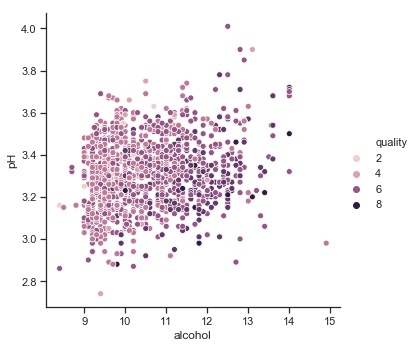

In [61]:
sns.relplot(x="alcohol", y="pH", hue = 'quality', data=data);
plt.show()

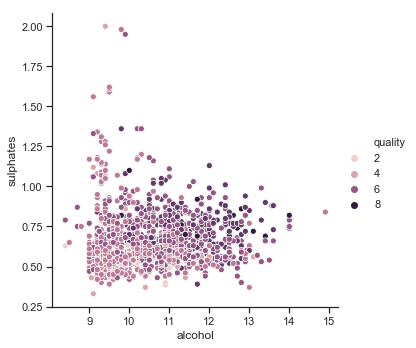

In [62]:
sns.relplot(x="alcohol", y="sulphates", hue = 'quality', data=data);
plt.show()

#Observations

##Classification

##Libraries

In [64]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

### testing accuracy of various classifier

In [66]:
clf1 = tree.DecisionTreeClassifier()
t0 = time()
clf1.fit(features_train,labels_train)
print ("DT training time:", round(time()-t0, 3), "s")
print ("DT Accuracy: ",clf1.score(features_test,labels_test))

DT training time: 0.007 s
DT Accuracy:  0.4875


In [67]:
t0 = time()
clf2 = svm.SVC(gamma=1, C=1)
clf2.fit(features_train,labels_train)
print ("SVM training time:", round(time()-t0, 3), "s")
print ("SVM Accuracy: ",clf2.score(features_test,labels_test))

SVM training time: 0.117 s
SVM Accuracy:  0.40625


In [68]:
t0 = time()
clf4 = GaussianNB()
clf4.fit(features_train,labels_train)
print ("Naive Bayes training time:", round(time()-t0, 3), "s")
print ("Naive Bayes Accuracy: ",clf4.score(features_test,labels_test))

Naive Bayes training time: 0.005 s
Naive Bayes Accuracy:  0.44375


In [70]:
t0 = time()
clf5 = svm.LinearSVC()
clf5.fit(features_train,labels_train)
print ("Linear SVM training time:", round(time()-t0, 3), "s")
print ("Linear SVM Accuracy: ",clf5.score(features_test,labels_test))

Linear SVM training time: 0.03 s
Linear SVM Accuracy:  0.44375


## Conclusion 

##Best_algorithm_turns_out_be_Linear_SVM_As_Max_Accuracy_Reached_Is_58.7%

### Testing Various Regression Algorithms

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [80]:
t0 = time()
reg1 = LinearRegression()
reg1.fit(features_train,labels_train)
print ("Time:", round(time()-t0, 3), "s")
pred = reg1.predict(features_test)
print("Error:",mean_squared_error(labels_test, pred))

Time: 0.065 s


NameError: name 'mean_squared_error' is not defined